In [15]:
# libary
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 22.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_excel("data/20220926_1차회귀파일.xlsx")

In [17]:
data

,ID,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,인접역 수,전용면적,건축년도,건물연령,구별인구,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,조합시행TF,철근철골구조TF,홈네트워크TF,관리시설수
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,129125.0,42166.7,4.162633,32.7,0,80,1987.0,31.0,557865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 강남구 개포동 개포주공1단지 40,145736.8,10166.7,16.507998,7.0,1,40,1982.0,36.0,557865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시 강남구 개포동 개포주공5단지 60,136666.7,42678.6,0.000000,31.2,1,60,1983.0,35.0,557865,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,서울특별시 강남구 개포동 개포주공5단지 80,177416.7,45000.0,0.000000,25.4,1,80,1983.0,35.0,557865,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,서울특별시 강남구 개포동 개포주공6단지 50,125900.0,37909.1,9.134234,30.1,1,50,1983.0,35.0,557865,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,서울특별시 중랑구 중화동 중화동건영아파트 60,25000.0,2500.0,6.000000,10.0,1,60,1998.0,20.0,411552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087,서울특별시 중랑구 중화동 태능에셈빌 80,35000.0,15000.0,0.000000,42.9,1,80,2005.0,13.0,411552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4088,서울특별시 중랑구 중화동 한신아파트 50,31756.2,24571.4,0.000000,77.4,5,50,1997.0,21.0,411552,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0
4089,서울특별시 중랑구 중화동 한신아파트 60,36534.6,28111.1,2.996064,76.9,5,60,1997.1,20.9,411552,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0


In [18]:
del data['ID']
del data['건축년도']
data.dropna(inplace=True)

In [19]:
data

,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,인접역 수,전용면적,건물연령,구별인구,거래량1,거래허가제TF,...,중앙난방TF,지역난방TF,복도식TF,혼합형TF,계단식TF,메이저시공사TF,조합시행TF,철근철골구조TF,홈네트워크TF,관리시설수
2,136666.7,42678.6,0.000000,31.2,1,60,35.0,557865,3,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,177416.7,45000.0,0.000000,25.4,1,80,35.0,557865,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,125900.0,37909.1,9.134234,30.1,1,50,35.0,557865,3,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
5,135200.0,43000.0,9.023669,31.8,1,60,35.0,557865,2,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
6,151500.0,50350.0,10.451045,33.2,1,70,35.0,557865,2,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,36300.0,13000.0,13.223140,35.8,1,80,27.0,411552,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
4084,44000.0,37500.0,0.000000,85.2,2,80,8.0,411552,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0
4088,31756.2,24571.4,0.000000,77.4,5,50,21.0,411552,8,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0
4089,36534.6,28111.1,2.996064,76.9,5,60,20.9,411552,26,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0


In [20]:
def heatmap(dataset):
    cmap = plt.cm.PuBu
    corr = dataset.corr()
    plt.figure(figsize=(25, 16))  
    sns.heatmap(corr, linewidths = 0.1, 
                vmax = 1.0, 
                square = True, 
                cmap = 'seismic', 
                linecolor = "white", 
                annot = True, 
                annot_kws = {"size" : 10})

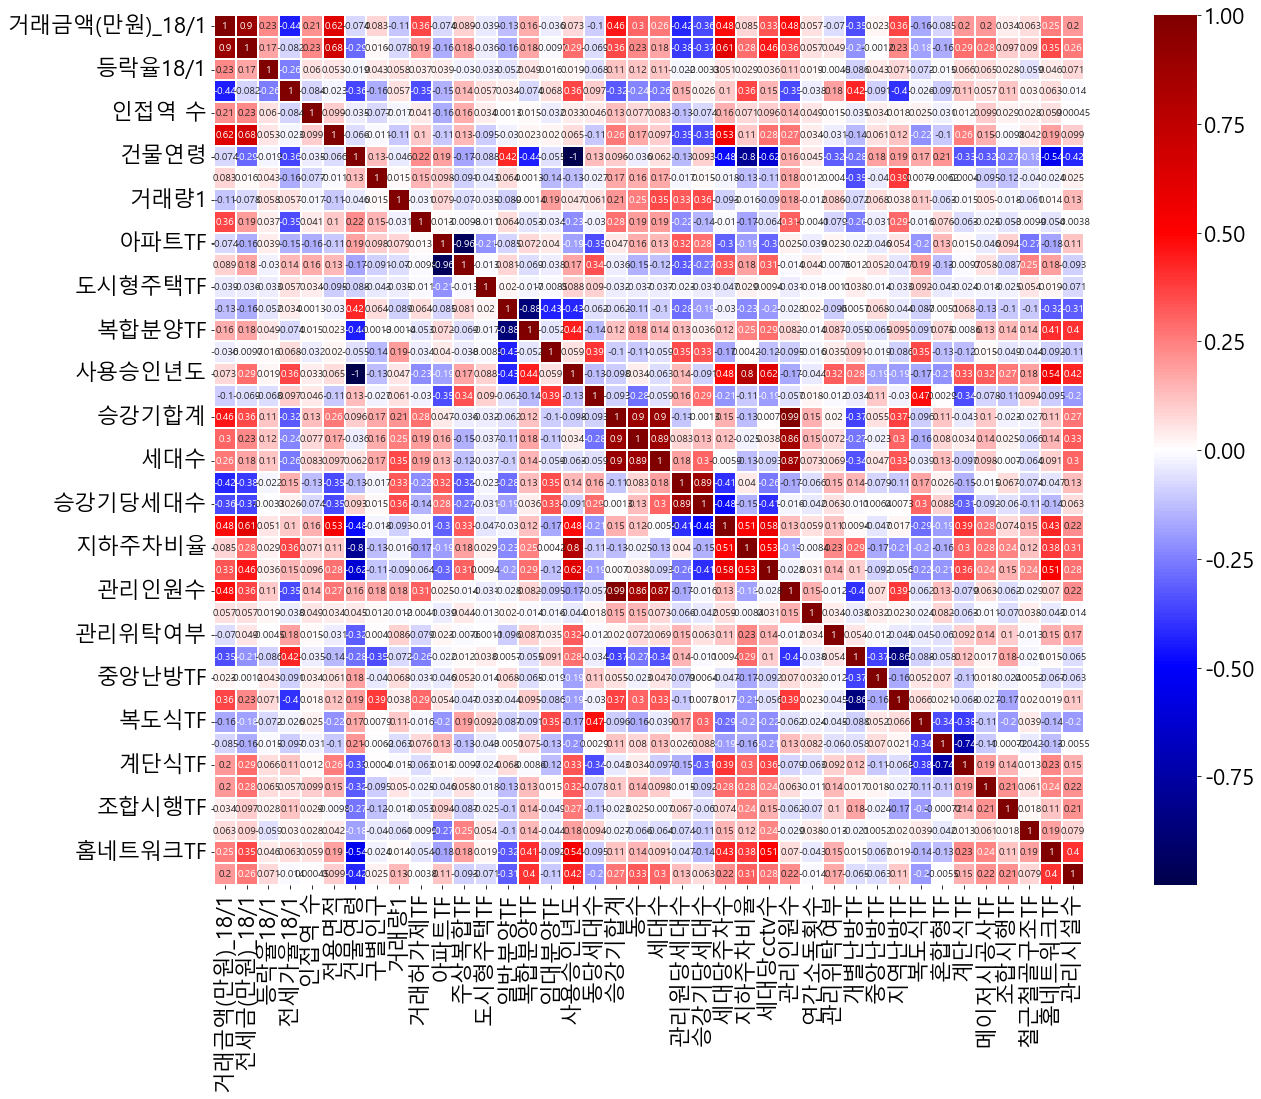

In [21]:
heatmap(data)

In [22]:
X = data.drop("거래금액(만원)_18/1", axis = 1)
y = data["거래금액(만원)_18/1"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(train_X, train_y)

# Inference
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

# r2 score
train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 


print('MAE & r2 score for train/val data set'), 
print('---------------------------------------------'), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2)), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

MAE & r2 score for train/val data set
---------------------------------------------
RMSE score:10039.386 , r2 score:0.953 for train dataset
RMSE score:10932.472 , r2 score:0.950 for validation dataset


In [23]:
train_temp = train_X
train_temp = sm.add_constant(train_temp)
ols = sm.OLS(train_y, train_temp).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          거래금액(만원)_18/1   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1403.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:51:16   Log-Likelihood:                -27412.
No. Observations:                2578   AIC:                         5.490e+04
Df Residuals:                    2540   BIC:                         5.512e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.893e+05   8.68e+05      0.679      0.497   -1.11e+06    2.29e+06
전세금(만원)_18/1     1.4402      0.014    100.105      0.000       1.412       1.468
등락율18/1         22.7592     41.509      0.548      0.584     -58.635     104.153
전세가율18/1     -1173.3763     20.239    -57.977      0.000   -1213.062   -1133.691
인접역 수         -681.4881    233.879     -2.914      0.004   -1140.100    -222.876
전용면적            36.1026     11.026      3.274      0.001      14.482      57.723
건물연령          -341.7522    715.157     -0.478      0.633   -1744.102    1060.598
구별인구             0.0002      0.002      0.081      0.936      -0.004       0.004
거래량1           -98.8782     36.761     -2.690      0.007    -170.963     -26.793
거래허가제TF       1.179e+04   1179.004     10.000      0.000    9478.453    1.41e+04
아파트TF         1828.6468   5131.918      0.356      0.722   -8234.523    1.19e+04
주상복합TF       -1713.0648   5195.600     -0.330      0.742   -1.19e+04    8474.979
도시형주택TF       1.548e+04   6458.973      2.397      0.017    2819.503    2.82e+04
일반분양TF        1.953e+05   2.89e+05      0.675      0.500   -3.72e+05    7.63e+05
복합분양TF        1.964e+05   2.89e+05      0.679      0.497   -3.71e+05    7.64e+05
임대분양TF        1.976e+05   2.89e+05      0.683      0.495    -3.7e+05    7.65e+05
사용승인년도        -440.9849    717.121     -0.615      0.539   -1847.187     965.217
동당세대수           -2.7831      4.886     -0.570      0.569     -12.364       6.798
승강기합계          113.0879     29.419      3.844      0.000      55.401     170.775
동수            -210.3753     58.794     -3.578      0.000    -325.665     -95.086
세대수             -6.2627      0.947     -6.614      0.000      -8.119      -4.406
관리원당세대수         -4.1640     92.832     -0.045      0.964    -186.199     177.871
승강기당세대수        390.8269    284.192      1.375      0.169    -166.444     948.098
세대당주차수        -554.1278    844.350     -0.656      0.512   -2209.812    1101.556
지하주차비율        1864.9586    968.587      1.925      0.054     -34.342    3764.259
세대당cctv수      6814.0431   2314.258      2.944      0.003    2276.017    1.14e+04
관리인원수          -21.2612     63.464     -0.335      0.738    -145.709     103.186
연간소독횟수        -117.0613     37.881     -3.090      0.002    -191.343     -42.780
관리위탁여부       -5159.1737    716.748     -7.198      0.000   -6564.644   -3753.703
개별난방TF       -1.227e+04   7460.829     -1.644      0.100   -2.69e+04    2363.415
중앙난방TF       -1.427e+04   7505.865     -1.902      0.057    -2.9e+04     444.508
지역난방TF       -1.115e+04   7481.897     -1.490      0.136   -2.58e+04    3522.908
복도식TF         1.945e+05   2.89e+05      0.672      0.502   -3.73e+05    7.62e+05
혼합형TF         1.972e+05   2.89e+05      0.681      0.496    -3.7e+05    7.65e+05
계단식TF         1.977e+05   2.89e+05      0.683      0.495    -3.7e+05    7.65e+05
메이저시공